In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.spatial.transform import Rotation as r

In [2]:
def func(T, trans, phi, theta):

    # extract Tx values
    Ta, Tb, Tc = trans
    
    return Ta * np.cos(theta)**2 * np.sin(phi)**2 + \
           Tb * np.sin(theta)**2 * np.sin(phi)**2 + \
           Tc * np.cos(phi)**2 - \
           T

In [3]:
# generate data all along the space
theta = np.linspace(0, 2*np.pi, 100)
phi = np.arccos(1 - 2 * np.linspace(0, 1, 100))
phi, theta = np.meshgrid(phi, theta)

results = func(T=50, trans=(90, 50, 20), phi=phi, theta=theta)

In [4]:
results.min(), results.max()

(-30.0, 39.99285787164574)

check when $results \thickapprox 0$

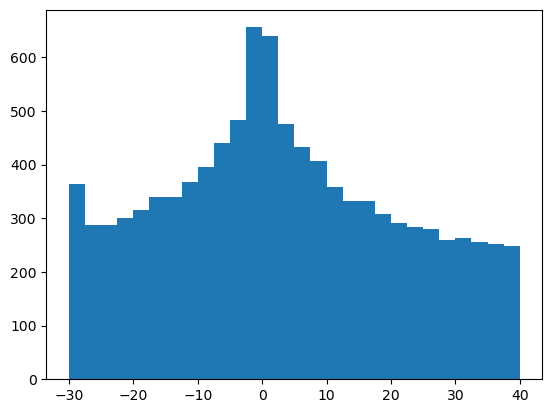

In [5]:
_ = plt.hist(results.ravel(), bins='fd')

In [6]:
theta[(results > -0.005) & (results < 0.005)]

array([1.65012947, 1.65012947, 4.63305583, 4.63305583])

In [7]:
results[(results > -0.005) & (results < 0.005)]

array([0.00121213, 0.00121213, 0.00121213, 0.00121213])

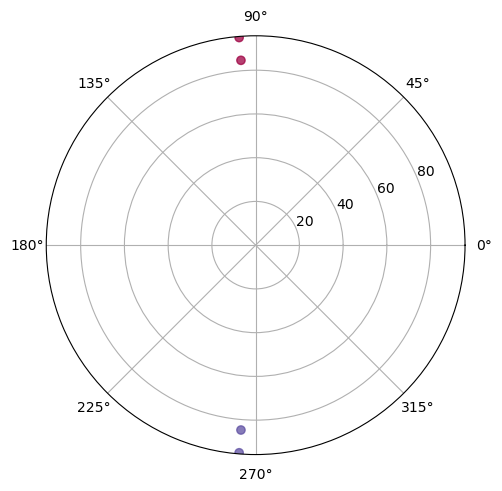

In [8]:
# make plot
fig, ax = plt.subplots(subplot_kw={"projection": "polar"}, constrained_layout=True)
_ = ax.scatter(theta[(results > -0.005) & (results < 0.005)],
               np.rad2deg(phi[(results > -0.005) & (results < 0.005)]),
               c=results[(results > -0.005) & (results < 0.005)],
               cmap='Spectral_r', alpha=0.75)

In [9]:
def f_test(angles):
    return 90 * np.cos(angles[1])**2 * np.sin(angles[0])**2 + \
           50 * np.sin(angles[1])**2 * np.sin(angles[0])**2 + \
           20 * np.cos(angles[0])**2 - \
           50


from scipy.optimize import least_squares

solution = least_squares(f_test, x0=(np.pi/2, np.pi), bounds=((0, 0), (np.pi, 2*np.pi)))

In [10]:
solution

     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [ 5.334e-07]
           x: [ 8.049e-01  5.697e+00]
        cost: 1.4228045558835503e-13
         jac: [[ 5.771e+01  1.915e+01]]
        grad: [ 3.078e-05  1.022e-05]
  optimality: 5.820620586873423e-05
 active_mask: [0 0]
        nfev: 35
        njev: 16

In [11]:
np.around(np.rad2deg(solution.x), decimals=1)

array([ 46.1, 326.4])